In [1]:
import pandas as pd, geopandas as gpd, numpy as np

In [9]:
# Load data from geojson file
unsaniert = gpd.read_file('data/nw_abs_geb_unsaniert.json')
saniert = gpd.read_file('data/nw_abs_geb_saniert.json')


In [92]:
unsaniert_spez = gpd.read_file('data/nw_spez_geb_unsaniert.json')
saniert_spez = gpd.read_file('data/nw_spez_geb_saniert.json')

In [3]:
stadtteile = gpd.read_file('data/stadtteile.json')

In [17]:
strassen = gpd.read_file('data/strassen.json')

In [4]:
# Select Stadtteil named Rothenburgsort
rothenburgsort = stadtteile[stadtteile['stadtteil_name'] == 'Rothenburgsort']

In [5]:
rothenburgsort

,id,bezirk,bezirk_name,stadtteil_name,stadtteil_schluessel,stadtteil_nummer,geometry
11,APP_STADTTEILE_12,1,Hamburg-Mitte,Rothenburgsort,02114,114,"MULTIPOLYGON (((10.03796 53.52799, 10.03783 53..."


<AxesSubplot: >

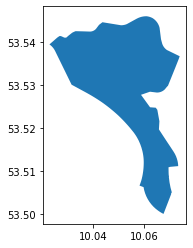

In [6]:
rothenburgsort.plot()

In [7]:
# Save Rothenburgsort as geojson file
rothenburgsort.to_file('data/rothenburgsort.json', driver='GeoJSON')

In [8]:
# Load Rothenburgsort from geojson file
rothenburgsort = gpd.read_file('data/rothenburgsort.json')

In [22]:
unsaniert_rothenburgsort = gpd.sjoin(unsaniert, rothenburgsort, how='inner', op='intersects')
saniert_rothenburgsort = gpd.sjoin(saniert, rothenburgsort, how='inner', op='intersects')

/Users/hsadmin/.conda/envs/geo-env/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3382: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/Users/hsadmin/.conda/envs/geo-env/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3382: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [93]:
unsaniert_rothenburgsort_spez = gpd.sjoin(unsaniert_spez, rothenburgsort, how='inner', op='intersects')
saniert_rothenburgsort_spez = gpd.sjoin(saniert_spez, rothenburgsort, how='inner', op='intersects')

/Users/hsadmin/.conda/envs/geo-env/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3382: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/Users/hsadmin/.conda/envs/geo-env/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3382: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [23]:
# Set ESPG projection
unsaniert_rothenburgsort = unsaniert_rothenburgsort.to_crs(epsg=25832)
saniert_rothenburgsort = saniert_rothenburgsort.to_crs(epsg=25832)

In [24]:
# Convert to WGS84
unsaniert_rothenburgsort = unsaniert_rothenburgsort.to_crs(epsg=4326)
saniert_rothenburgsort = saniert_rothenburgsort.to_crs(epsg=4326)

In [25]:
# Save Rothenburgsort as geojson file
unsaniert_rothenburgsort.to_file('data/unsaniert_rothenburgsort.json', driver='GeoJSON')
saniert_rothenburgsort.to_file('data/saniert_rothenburgsort.json', driver='GeoJSON')

In [94]:
# Save Rothenburgsort_spez as geojson file
unsaniert_rothenburgsort_spez.to_file('data/unsaniert_rothenburgsort_spez.json', driver='GeoJSON')
saniert_rothenburgsort_spez.to_file('data/saniert_rothenburgsort_spez.json', driver='GeoJSON')


In [26]:
# Load Rothenburgsort from geojson file
unsaniert_rothenburgsort = gpd.read_file('data/unsaniert_rothenburgsort.json')
saniert_rothenburgsort = gpd.read_file('data/saniert_rothenburgsort.json')

In [27]:
saniert_rothenburgsort

,id_left,anzahl_einheiten,beheizte_nutzflaeche,beheizte_wohnflaeche,waermebedarf_saniert,index_right,id_right,bezirk,bezirk_name,stadtteil_name,stadtteil_schluessel,stadtteil_nummer,geometry
0,DE.HH.UP_NW_ABS_GEB_SANIERT_1115797,6,1426,787,141363,0,APP_STADTTEILE_12,1,Hamburg-Mitte,Rothenburgsort,02114,114,"POLYGON ((10.03983 53.53411, 10.03959 53.53413..."
1,DE.HH.UP_NW_ABS_GEB_SANIERT_1115627,6,4808,203,181928,0,APP_STADTTEILE_12,1,Hamburg-Mitte,Rothenburgsort,02114,114,"POLYGON ((10.04984 53.54136, 10.05009 53.54144..."
2,DE.HH.UP_NW_ABS_GEB_SANIERT_1115752,9,4577,4577,455935,0,APP_STADTTEILE_12,1,Hamburg-Mitte,Rothenburgsort,02114,114,"POLYGON ((10.04706 53.53328, 10.04748 53.53312..."
3,DE.HH.UP_NW_ABS_GEB_SANIERT_1115753,7,3287,3287,214312,0,APP_STADTTEILE_12,1,Hamburg-Mitte,Rothenburgsort,02114,114,"POLYGON ((10.04917 53.53221, 10.04924 53.53218..."
4,DE.HH.UP_NW_ABS_GEB_SANIERT_1115754,10,15593,0,812256,0,APP_STADTTEILE_12,1,Hamburg-Mitte,Rothenburgsort,02114,114,"POLYGON ((10.04450 53.52954, 10.04442 53.52954..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,DE.HH.UP_NW_ABS_GEB_SANIERT_1115807,6,2547,2547,230249,0,APP_STADTTEILE_12,1,Hamburg-Mitte,Rothenburgsort,02114,114,"POLYGON ((10.03578 53.53385, 10.03587 53.53392..."
189,DE.HH.UP_NW_ABS_GEB_SANIERT_1115808,6,4322,4322,390709,0,APP_STADTTEILE_12,1,Hamburg-Mitte,Rothenburgsort,02114,114,"POLYGON ((10.03766 53.53308, 10.03772 53.53313..."
190,DE.HH.UP_NW_ABS_GEB_SANIERT_1115809,7,6978,6978,569884,0,APP_STADTTEILE_12,1,Hamburg-Mitte,Rothenburgsort,02114,114,"POLYGON ((10.03377 53.53454, 10.03385 53.53451..."
191,DE.HH.UP_NW_ABS_GEB_SANIERT_1115810,6,2988,2988,270116,0,APP_STADTTEILE_12,1,Hamburg-Mitte,Rothenburgsort,02114,114,"POLYGON ((10.03517 53.53374, 10.03519 53.53376..."


In [30]:
gebaeude = gpd.read_file('data/GebaeudeBauwerk.json')

In [31]:
gebaude_rothenburgsort = gpd.sjoin(gebaeude, rothenburgsort, how='inner', op='intersects')

/Users/hsadmin/.conda/envs/geo-env/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3382: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [33]:
# Save to geojson file
gebaude_rothenburgsort.to_file('data/gebaude_rothenburgsort.json', driver='GeoJSON')

<AxesSubplot: >

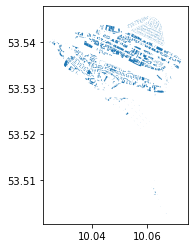

In [34]:
gebaude_rothenburgsort.plot()

In [39]:
# Nur Gebaeude filtern
gebaude_rothenburgsort = gebaude_rothenburgsort[gebaude_rothenburgsort['gebnutzbez'] == 'Gebaeude']

In [48]:

gebaude_rothenburgsort.funktion.value_counts()

Wohnhaus                                            239
Wohngebäude mit Handel und Dienstleistungen          28
Gebäude für Handel und Dienstleistung mit Wohnen     11
Wohngebäude mit Gewerbe und Industrie                 7
Gebäude für Gewerbe und Industrie mit Wohnen          6
Wohnheim                                              6
Gemischt genutztes Gebäude mit Wohnen                 5
Name: funktion, dtype: int64

In [45]:
# Gebäude, deren Funktion nicht Wohnen enthält, entfernen
gebaude_rothenburgsort = gebaude_rothenburgsort[gebaude_rothenburgsort['funktion'].str.contains('Wohn')]


In [49]:
# Speichern als Wohngebäude
gebaude_rothenburgsort.to_file('data/wohngebaude_rothenburgsort.json', driver='GeoJSON')

In [50]:
# Wohngebäude laden
wohngebaude_rothenburgsort = gpd.read_file('data/wohngebaude_rothenburgsort.json')

<AxesSubplot: >

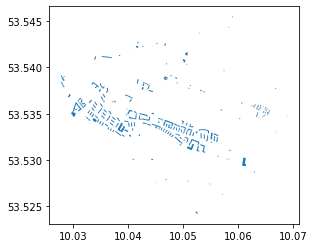

In [51]:
wohngebaude_rothenburgsort.plot()

In [52]:
wohngebaude_rothenburgsort.columns

Index(['id_left', 'oid', 'aktualit', 'gebnutzbez', 'funktion', 'gfkzshh',
       'rellage', 'name', 'anzahlgs', 'gmdschl', 'lagebeztxt', 'index_right',
       'id_right', 'bezirk', 'bezirk_name', 'stadtteil_name',
       'stadtteil_schluessel', 'stadtteil_nummer', 'geometry'],
      dtype='object')

In [55]:
wohngebaude_rothenburgsort = wohngebaude_rothenburgsort[['oid','anzahlgs', 'funktion', 'geometry']]

In [57]:
# Speichern
wohngebaude_rothenburgsort.to_file('data/wohngebaude_rothenburgsort.json', driver='GeoJSON')

In [110]:
# Laden
wohngebaude_rothenburgsort = gpd.read_file('data/wohngebaude_rothenburgsort.json')

In [111]:
# Grundfläche berechnen

wohngebaude_rothenburgsort['grundflache'] = wohngebaude_rothenburgsort['geometry'].to_crs(epsg=6933).area

In [112]:
wohngebaude_rothenburgsort

,oid,anzahlgs,funktion,geometry,grundflache
0,DEHHALKAJ0000xnfBL,1.0,Wohnhaus,"MULTIPOLYGON (((10.06312 53.53584, 10.06301 53...",54.781575
1,DEHHALKAJ0000xhIBL,1.0,Wohnhaus,"MULTIPOLYGON (((10.06502 53.53566, 10.06501 53...",84.620637
2,DEHHALKAJ0000xgsBL,1.0,Wohnhaus,"MULTIPOLYGON (((10.06284 53.53575, 10.06273 53...",132.952185
3,DEHHALKAJ0000xizBL,1.0,Wohnhaus,"MULTIPOLYGON (((10.06473 53.53482, 10.06473 53...",90.722587
4,DEHHALKAJ0000xhTBL,1.0,Wohnhaus,"MULTIPOLYGON (((10.06335 53.53560, 10.06339 53...",90.082629
...,...,...,...,...,...
297,DEHHALKAJ00013M4BL,4.0,Wohnhaus,"MULTIPOLYGON (((10.04608 53.53318, 10.04594 53...",385.360233
298,DEHHALKAJ00011bCBL,1.0,Wohnhaus,"MULTIPOLYGON (((10.05893 53.54550, 10.05899 53...",86.175483
299,DEHHALKAJ000119bBL,4.0,Wohnhaus,"MULTIPOLYGON (((10.04797 53.53245, 10.04784 53...",404.605389
300,DEHHALKAJ000138fBL,4.0,Wohnhaus,"MULTIPOLYGON (((10.03585 53.53479, 10.03565 53...",537.871834


In [113]:
# Brutto-Grundfläche berechnen
wohngebaude_rothenburgsort['brutto_grundflache'] = wohngebaude_rothenburgsort['grundflache'] * wohngebaude_rothenburgsort['anzahlgs']

In [114]:
wohngebaude_rothenburgsort

,oid,anzahlgs,funktion,geometry,grundflache,brutto_grundflache
0,DEHHALKAJ0000xnfBL,1.0,Wohnhaus,"MULTIPOLYGON (((10.06312 53.53584, 10.06301 53...",54.781575,54.781575
1,DEHHALKAJ0000xhIBL,1.0,Wohnhaus,"MULTIPOLYGON (((10.06502 53.53566, 10.06501 53...",84.620637,84.620637
2,DEHHALKAJ0000xgsBL,1.0,Wohnhaus,"MULTIPOLYGON (((10.06284 53.53575, 10.06273 53...",132.952185,132.952185
3,DEHHALKAJ0000xizBL,1.0,Wohnhaus,"MULTIPOLYGON (((10.06473 53.53482, 10.06473 53...",90.722587,90.722587
4,DEHHALKAJ0000xhTBL,1.0,Wohnhaus,"MULTIPOLYGON (((10.06335 53.53560, 10.06339 53...",90.082629,90.082629
...,...,...,...,...,...,...
297,DEHHALKAJ00013M4BL,4.0,Wohnhaus,"MULTIPOLYGON (((10.04608 53.53318, 10.04594 53...",385.360233,1541.440930
298,DEHHALKAJ00011bCBL,1.0,Wohnhaus,"MULTIPOLYGON (((10.05893 53.54550, 10.05899 53...",86.175483,86.175483
299,DEHHALKAJ000119bBL,4.0,Wohnhaus,"MULTIPOLYGON (((10.04797 53.53245, 10.04784 53...",404.605389,1618.421556
300,DEHHALKAJ000138fBL,4.0,Wohnhaus,"MULTIPOLYGON (((10.03585 53.53479, 10.03565 53...",537.871834,2151.487335


In [115]:
durchschnittliche_wohnungsgroesse = 61.8 #m2

# Anzahl an Wohnungen berechnen und abrunden
wohngebaude_rothenburgsort['anzahl_wohnungen'] = np.floor(wohngebaude_rothenburgsort['brutto_grundflache'] / durchschnittliche_wohnungsgroesse)


In [116]:
# Gesamte Wohnugnen berechnen
wohngebaude_rothenburgsort['anzahl_wohnungen'].sum()

7576.0

In [74]:
# Gebäude, deren Funktion kein reines Wohnhaus ist
wohngebaude_rothenburgsort[~wohngebaude_rothenburgsort['funktion'].str.contains('Wohnhaus')]['anzahl_wohnungen'].sum()

2319.0

In [75]:
# Wohngebäude den unsanierten Gebäuden zuordnen
unsaniert_rothenburgsort = gpd.sjoin(unsaniert_rothenburgsort, wohngebaude_rothenburgsort, how='inner', op='intersects')

/Users/hsadmin/.conda/envs/geo-env/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3382: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


ValueError: 'index_left' and 'index_right' cannot be names in the frames being joined

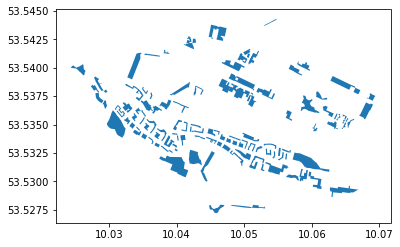

In [82]:
unsaniert_wohnen = unsaniert_rothenburgsort[unsaniert_rothenburgsort["beheizte_wohnflaeche"] > 0].plot()

In [100]:
# Drop columns index_right
unsaniert_rothenburgsort_spez = unsaniert_rothenburgsort_spez.drop(columns=['index_right'])
saniert_rothenburgsort_spez = saniert_rothenburgsort_spez.drop(columns=['index_right'])

<AxesSubplot: >

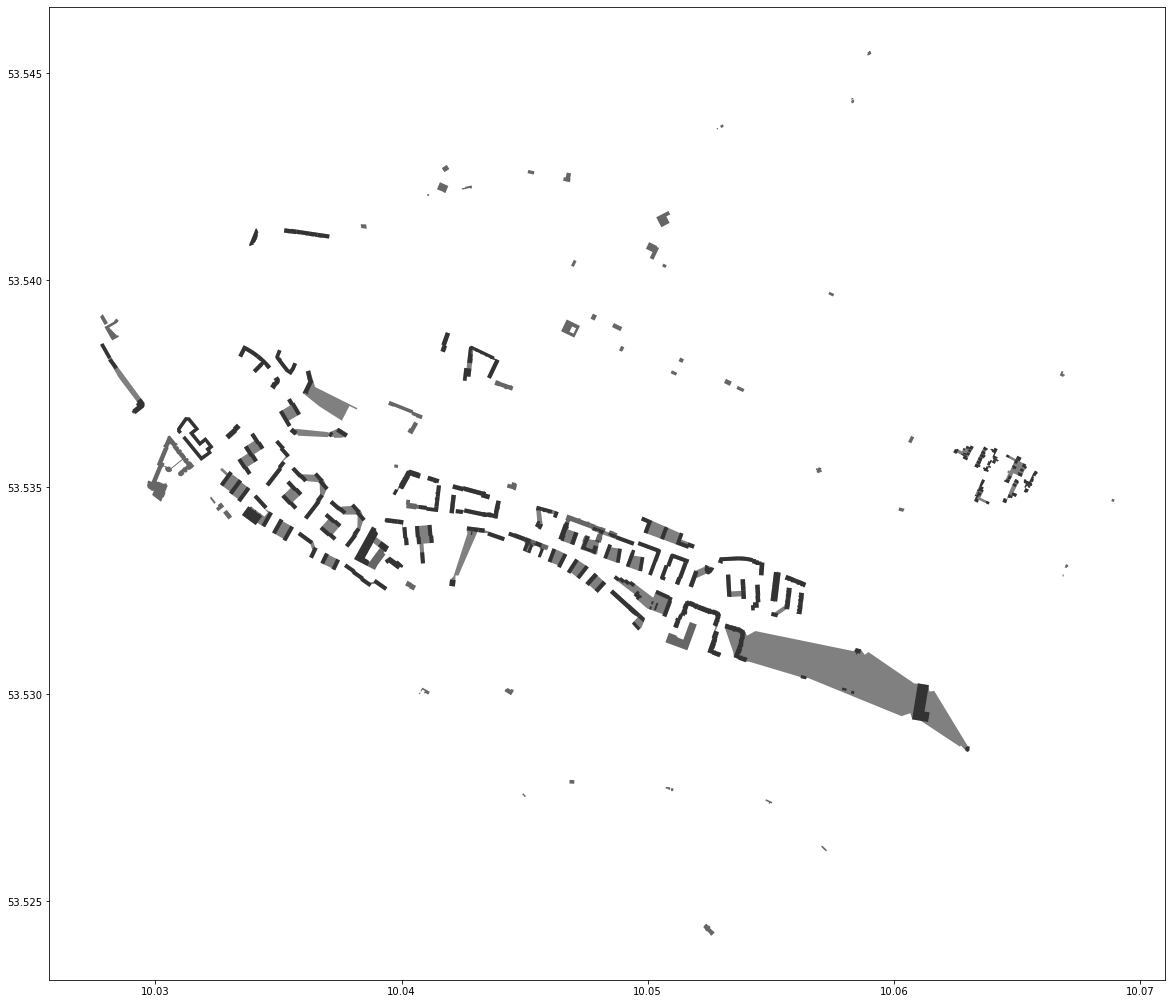

In [96]:
# Unsaniert Wohnen in blau und wohngebaude_rothenburgsort in schwarz plotten, figsize = (20,20)
ax = unsaniert_rothenburgsort_spez[unsaniert_rothenburgsort_spez["beheizte_wohnflaeche"] > 0].plot(color='grey', figsize=(20,20))
wohngebaude_rothenburgsort.plot(ax=ax, color=(0,0,0,0.6))


In [126]:
# Join unsaniert_rothenburgsort_spez and wohngebaude_rothenburgsort
wohngebeude_rothenburgsort_waerme = gpd.sjoin(unsaniert_rothenburgsort_spez, wohngebaude_rothenburgsort, how='right', op='intersects')
wohngebeude_rothenburgsort_waerme = wohngebeude_rothenburgsort_waerme[['anzahlgs', 'funktion', 'geometry', 'grundflache', 'brutto_grundflache','anzahl_wohnungen','spez_waermebedarf_unsaniert']]

wohngebeude_rothenburgsort_waerme = gpd.sjoin(saniert_rothenburgsort_spez, wohngebeude_rothenburgsort_waerme, how='right', op='intersects')
wohngebeude_rothenburgsort_waerme = wohngebeude_rothenburgsort_waerme[['anzahlgs', 'funktion', 'geometry', 'grundflache', 'brutto_grundflache','anzahl_wohnungen','spez_waermebedarf_unsaniert', 'spez_waermebedarf_saniert']]


/Users/hsadmin/.conda/envs/geo-env/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3382: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/Users/hsadmin/.conda/envs/geo-env/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3382: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [127]:
wohngebeude_rothenburgsort_waerme

,anzahlgs,funktion,geometry,grundflache,brutto_grundflache,anzahl_wohnungen,spez_waermebedarf_unsaniert,spez_waermebedarf_saniert
0,1.0,Wohnhaus,"MULTIPOLYGON (((10.06312 53.53584, 10.06301 53...",54.781575,54.781575,0.0,164.0,115.0
1,1.0,Wohnhaus,"MULTIPOLYGON (((10.06502 53.53566, 10.06501 53...",84.620637,84.620637,1.0,163.0,114.0
2,1.0,Wohnhaus,"MULTIPOLYGON (((10.06284 53.53575, 10.06273 53...",132.952185,132.952185,2.0,164.0,115.0
3,1.0,Wohnhaus,"MULTIPOLYGON (((10.06473 53.53482, 10.06473 53...",90.722587,90.722587,1.0,164.0,115.0
4,1.0,Wohnhaus,"MULTIPOLYGON (((10.06335 53.53560, 10.06339 53...",90.082629,90.082629,1.0,164.0,115.0
...,...,...,...,...,...,...,...,...
297,4.0,Wohnhaus,"MULTIPOLYGON (((10.04608 53.53318, 10.04594 53...",385.360233,1541.440930,24.0,165.0,103.0
298,1.0,Wohnhaus,"MULTIPOLYGON (((10.05893 53.54550, 10.05899 53...",86.175483,86.175483,1.0,NaN,NaN
299,4.0,Wohnhaus,"MULTIPOLYGON (((10.04797 53.53245, 10.04784 53...",404.605389,1618.421556,26.0,165.0,103.0
300,4.0,Wohnhaus,"MULTIPOLYGON (((10.03585 53.53479, 10.03565 53...",537.871834,2151.487335,34.0,140.0,90.0


<AxesSubplot: >

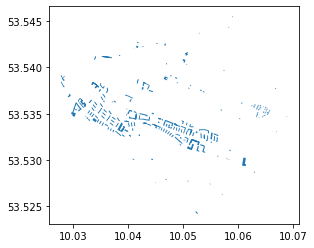

In [128]:
wohngebeude_rothenburgsort_waerme.plot()

In [129]:
# Spalten umbenennen
wohngebeude_rothenburgsort_waerme = wohngebeude_rothenburgsort_waerme.rename(columns={'spez_waermebedarf_unsaniert': 'wärmebedarf_unsaniert', 'spez_waermebedarf_saniert': 'wärmebedarf_saniert'})


In [130]:
wohngebeude_rothenburgsort_waerme

,anzahlgs,funktion,geometry,grundflache,brutto_grundflache,anzahl_wohnungen,wärmebedarf_unsaniert,wärmebedarf_saniert
0,1.0,Wohnhaus,"MULTIPOLYGON (((10.06312 53.53584, 10.06301 53...",54.781575,54.781575,0.0,164.0,115.0
1,1.0,Wohnhaus,"MULTIPOLYGON (((10.06502 53.53566, 10.06501 53...",84.620637,84.620637,1.0,163.0,114.0
2,1.0,Wohnhaus,"MULTIPOLYGON (((10.06284 53.53575, 10.06273 53...",132.952185,132.952185,2.0,164.0,115.0
3,1.0,Wohnhaus,"MULTIPOLYGON (((10.06473 53.53482, 10.06473 53...",90.722587,90.722587,1.0,164.0,115.0
4,1.0,Wohnhaus,"MULTIPOLYGON (((10.06335 53.53560, 10.06339 53...",90.082629,90.082629,1.0,164.0,115.0
...,...,...,...,...,...,...,...,...
297,4.0,Wohnhaus,"MULTIPOLYGON (((10.04608 53.53318, 10.04594 53...",385.360233,1541.440930,24.0,165.0,103.0
298,1.0,Wohnhaus,"MULTIPOLYGON (((10.05893 53.54550, 10.05899 53...",86.175483,86.175483,1.0,NaN,NaN
299,4.0,Wohnhaus,"MULTIPOLYGON (((10.04797 53.53245, 10.04784 53...",404.605389,1618.421556,26.0,165.0,103.0
300,4.0,Wohnhaus,"MULTIPOLYGON (((10.03585 53.53479, 10.03565 53...",537.871834,2151.487335,34.0,140.0,90.0


In [131]:
# Speichern
wohngebeude_rothenburgsort_waerme.to_file('data/wohngebeude_rothenburgsort_waerme.json', driver='GeoJSON')